<a href="https://colab.research.google.com/github/nflorezasu/MAT-421/blob/main/Homework_3_NickFlorez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

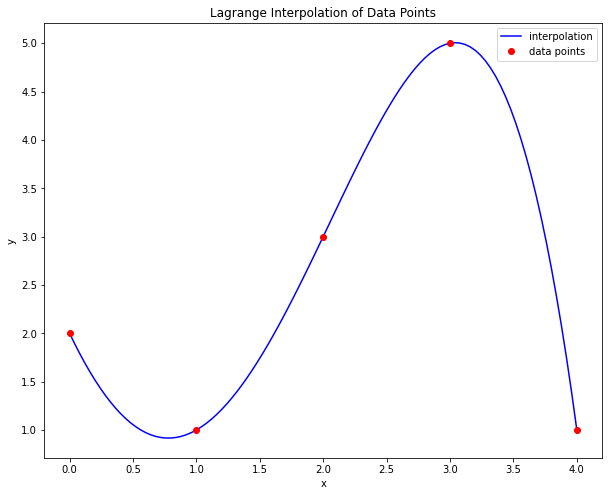

In [8]:
#Problem 9
#Lagrange function for interpolation
import numpy as np
import matplotlib.pyplot as plt

def my_lagrange(x,y,X):
    Y = 0
    #first for loop
    for i in range(len(x)):
        P = 1
        #second for loop
        for j in range(len(x)):
            if i != j:
                #if i not equal to j, then create lagrange
                Px = X - x[j]
                Dx = x[i]-x[j]
                P = (P*Px)/Dx
        #function to tie it all together and print correct graph
        Y = y[i]*P+Y
    return Y

#Test cases:
x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

X = np.linspace(0, 4, 101)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_lagrange(x, y, X), "b", label = "interpolation")
plt.plot(x, y, "ro", label = "data points")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Lagrange Interpolation of Data Points")
plt.legend()
plt.show()

  

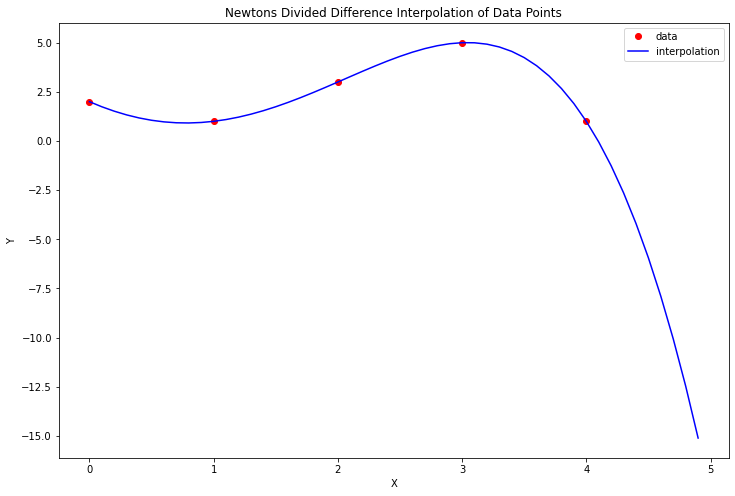

In [10]:
#Problem 10
#Newton's Polynomial interpolation

#Function divided_diff taken from book
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x,y):
    """
    function to calculate the divided
    difference table
    """
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i])
    return coef

#function newton_poly taken from book
def newton_poly(coef, x_data, x):
    """
    evaluate the Newton polynomial
    at x
    """
    n = len(x_data) - 1
    p = coef[n]

    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

#Test cases:
x = [0,1,2,3,4]
y = [2,1,3,5,1]

a_s = divided_diff(x,y)[0,:] #divided difference coefficient

x_new = np.arange(0,5,0.1) #put in correct format, evaluate new data points
y_new = newton_poly(a_s,x,x_new)

plt.figure(figsize=(12,8))
plt.plot(x, y, "ro", label = "data")
plt.plot(x_new, y_new, "b", label = "interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Newtons Divided Difference Interpolation of Data Points")
plt.legend()
plt.show()